<a href="https://colab.research.google.com/github/ingrid-revitti/DS/blob/main/TimeSeries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'monthly-beer-production-in-austr.csv'

In [ ]:
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [ ]:
# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Check for missing values, duplicate values, and gaps in the sequence of months
missing_months = df['Month'].isnull().sum()
duplicate_months = df['Month'].duplicated().sum()
sorted_months = df['Month'].sort_values()
gaps_in_sequence = sorted_months.diff().max() - sorted_months.diff().min()

print("Missing months:", missing_months)
print("Duplicate months:", duplicate_months)
print("Gaps in sequence:", gaps_in_sequence)


Missing months: 0
Duplicate months: 0
Gaps in sequence: 3 days 00:00:00


In [ ]:
sorted_months.diff().max()

Timedelta('31 days 00:00:00')

In [ ]:
sorted_months.diff().min()

Timedelta('28 days 00:00:00')

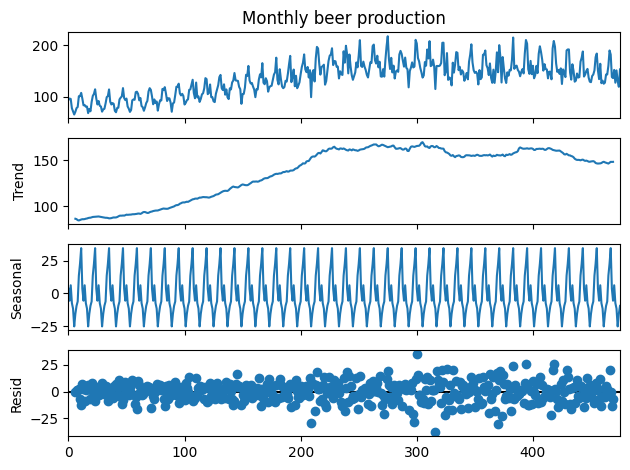

In [ ]:
result = seasonal_decompose(df['Monthly beer production'], model='additive', period=12)

# Plotar a decomposição
result.plot()
plt.tight_layout()
plt.show()

# **ARIMA = Auto Regressive Integrated Moving Average**

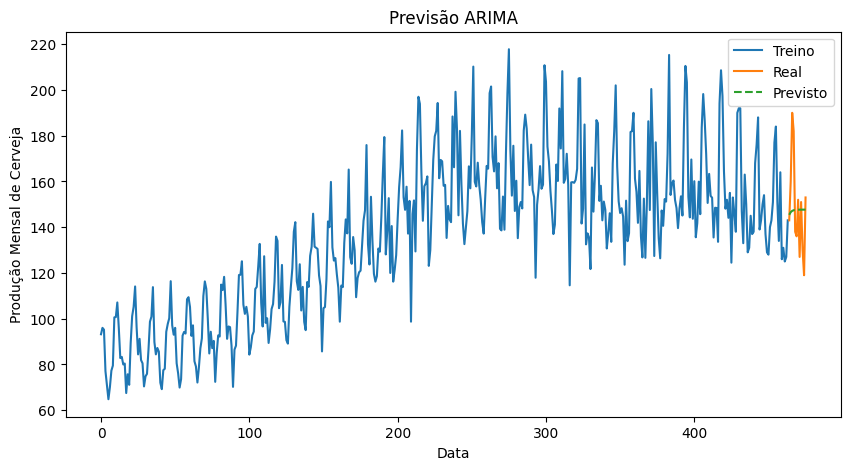

In [ ]:
train_data = df.iloc[:-12]
test_data = df.iloc[-12:]

model = ARIMA(train_data['Monthly beer production'], order=(1, 1, 1))
fitted_model = model.fit()

predictions = fitted_model.forecast(steps=12)

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Monthly beer production'], label='Treino')
plt.plot(test_data.index, test_data['Monthly beer production'], label='Real')
plt.plot(test_data.index, predictions, label='Previsto', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Produção Mensal de Cerveja')
plt.title('Previsão ARIMA')
plt.legend()
plt.show()


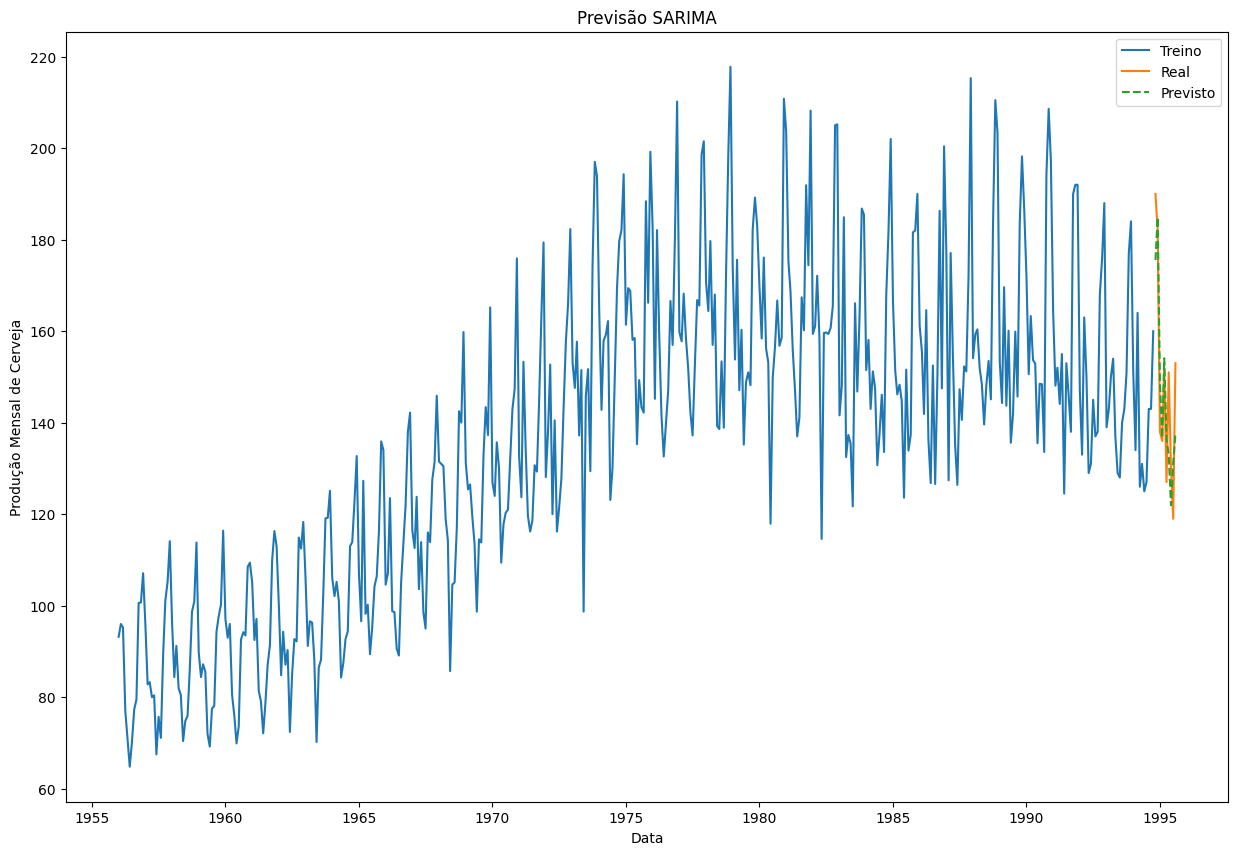

In [ ]:
df = pd.read_csv("monthly-beer-production-in-austr.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
data = df['Monthly beer production'].values

train_size = len(data) - 10
train_data, test_data = data[:train_size], data[train_size:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(15, 10))
plt.plot(df.index[:train_size], train_data, label='Treino')
plt.plot(df.index[train_size:], test_data, label='Real')
plt.plot(df.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Produção Mensal de Cerveja")
plt.title("Previsão SARIMA")
plt.legend()

plt.show()


In [ ]:
df1 = df[320:].copy()

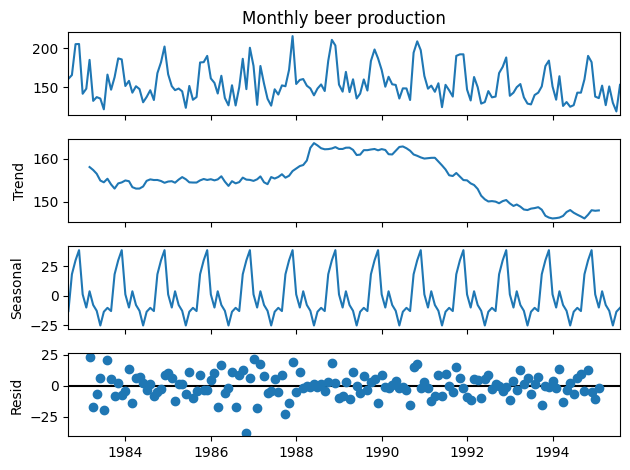

In [ ]:
result = seasonal_decompose(df1['Monthly beer production'], model='additive', period=12)

# Plotar a decomposição
result.plot()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


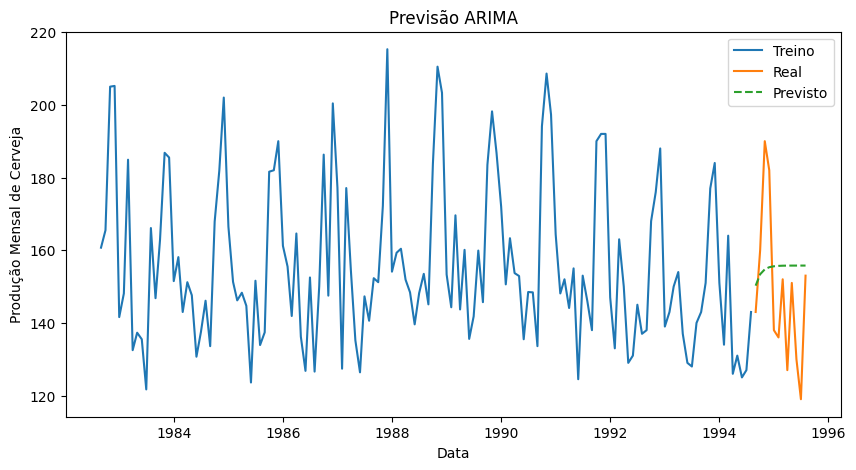

In [ ]:
train_data = df1.iloc[:-12]
test_data = df1.iloc[-12:]

model = ARIMA(train_data['Monthly beer production'], order=(1, 1, 1))
fitted_model = model.fit()

predictions = fitted_model.forecast(steps=12)

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Monthly beer production'], label='Treino')
plt.plot(test_data.index, test_data['Monthly beer production'], label='Real')
plt.plot(test_data.index, predictions, label='Previsto', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Produção Mensal de Cerveja')
plt.title('Previsão ARIMA')
plt.legend()
plt.show()


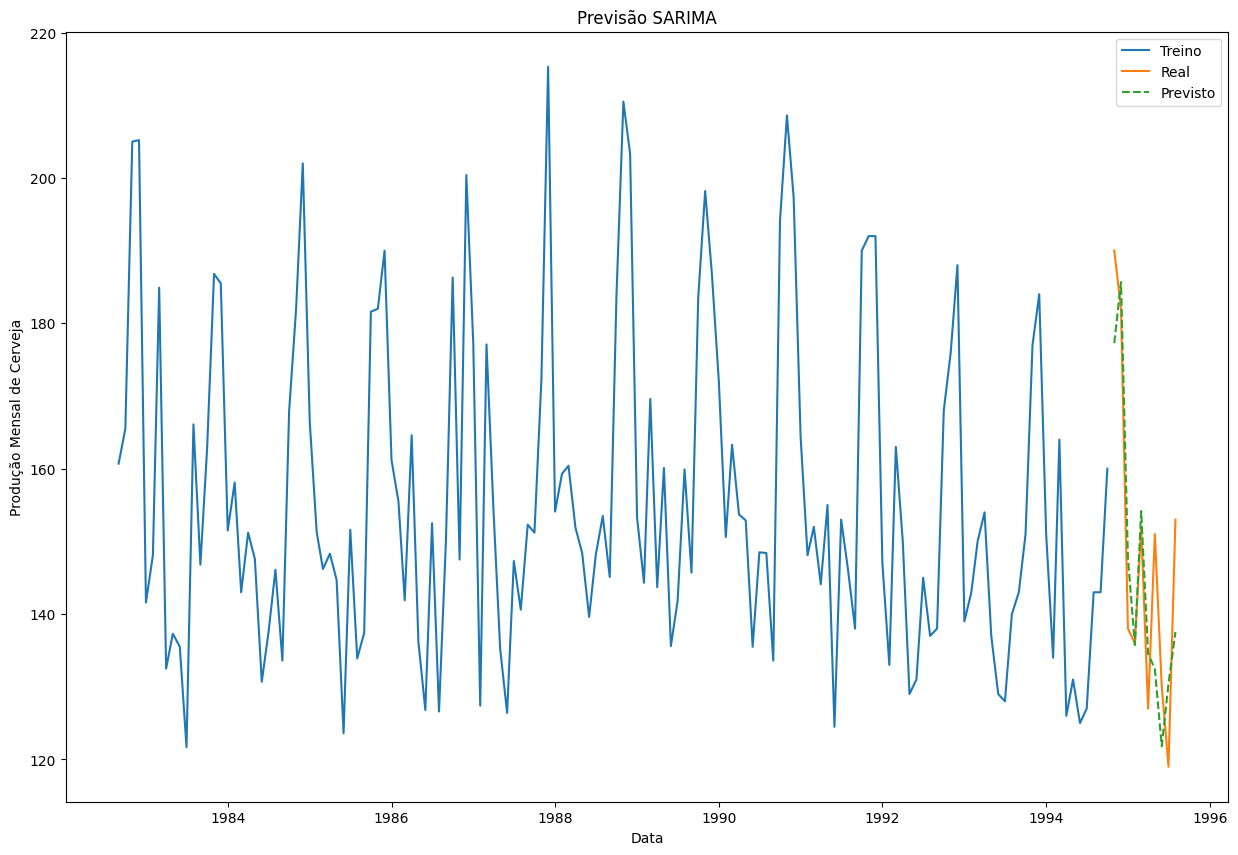

In [ ]:
data = df1['Monthly beer production'].values

train_size = len(data) - 10
train_data, test_data = data[:train_size], data[train_size:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(15, 10))
plt.plot(df1.index[:train_size], train_data, label='Treino')
plt.plot(df1.index[train_size:], test_data, label='Real')
plt.plot(df1.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Produção Mensal de Cerveja")
plt.title("Previsão SARIMA")
plt.legend()

plt.show()

# **Atividade**

In [ ]:
df_temp = pd.read_csv('daily-minimum-temperatures-in-me.csv', sep = ',', decimal = '.')

In [ ]:
df_temp

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Diff
0,1981-01-01,20.7,NaT
1,1981-01-02,17.9,1 days
2,1981-01-03,18.8,1 days
3,1981-01-04,14.6,1 days
4,1981-01-05,15.8,1 days
...,...,...,...
3645,1990-12-27,14.0,1 days
3646,1990-12-28,13.6,1 days
3647,1990-12-29,13.5,1 days
3648,1990-12-30,15.7,1 days


In [ ]:
# df_temp.loc[565,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = 3.05

In [ ]:
df_temp.loc[564:567]

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
564,1982-07-19,5.2
565,1982-07-20,?0.2
566,1982-07-21,?0.8
567,1982-07-22,0.9


In [ ]:
num1 = float(df_temp.loc[564,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'])
num2 = float(df_temp.loc[567,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'])
dif = (num1-num2)/3
df_temp.loc[565,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = num1 - dif
df_temp.loc[566,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = (num1 - dif) - dif

In [ ]:
dif = (num1-num2)/3

In [ ]:
df_temp.loc[565,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = num1 - dif

In [ ]:
df_temp.loc[566,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = (num1 - dif) - dif

In [ ]:
linhas_com_interrogacao = df_temp[df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].astype(str).str.contains('\?', na=False)]

# Exibir as linhas encontradas
print(linhas_com_interrogacao)

            Date Daily minimum temperatures in Melbourne, Australia, 1981-1990
1290  1984-07-14                                               ?0.1           


In [ ]:
df_temp.loc[1290,'Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = 0.1

In [ ]:
# df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].str.replace('?', '')


In [ ]:
# Convert the 'Month' column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Check for missing values, duplicate values, and gaps in the sequence of months
missing_date = df_temp['Date'].isnull().sum()
duplicate_date = df_temp['Date'].duplicated().sum()
sorted_date = df_temp['Date'].sort_values()
gaps_in_sequence = sorted_date.diff().max() - sorted_date.diff().min()

print("Missing date:", missing_date)
print("Duplicate date:", duplicate_date)
print("Gaps in sequence:", gaps_in_sequence)

Missing date: 0
Duplicate date: 0
Gaps in sequence: 1 days 00:00:00


In [ ]:
df_temp.shape

(3650, 2)

In [ ]:
sorted_date.diff().max()

Timedelta('2 days 00:00:00')

In [ ]:
sorted_date.diff().min()

Timedelta('1 days 00:00:00')

In [ ]:
df_temp.sort_values('Date', inplace=True)

In [ ]:
df_temp['Diff'] = df_temp['Date'].diff()

In [ ]:
df_temp[df_temp.Diff > '1 days']

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Diff
1460,1985-01-01,13.3,2 days
2920,1989-01-01,14.3,2 days


In [ ]:
df_temp.iloc[1459]

Date                                                             1984-12-30 00:00:00
Daily minimum temperatures in Melbourne, Australia, 1981-1990                   16.4
Diff                                                                 1 days 00:00:00
Name: 1459, dtype: object

In [ ]:
df_temp.iloc[2919]

Date                                                             1988-12-30 00:00:00
Daily minimum temperatures in Melbourne, Australia, 1981-1990                   14.1
Diff                                                                 1 days 00:00:00
Name: 2919, dtype: object

In [ ]:
# fala com o índice
df_temp.iloc[[1459,2919], 0]

1459   1984-12-30
2919   1988-12-30
Name: Date, dtype: datetime64[ns]

In [ ]:
# fala com o nome da linha
df_temp.loc[[1459,2919],'Date']

1459   1984-12-30
2919   1988-12-30
Name: Date, dtype: datetime64[ns]

In [ ]:
valores_nulos = df_temp[df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].isnull()]
print(valores_nulos)


Empty DataFrame
Columns: [Date, Daily minimum temperatures in Melbourne, Australia, 1981-1990, Diff]
Index: []


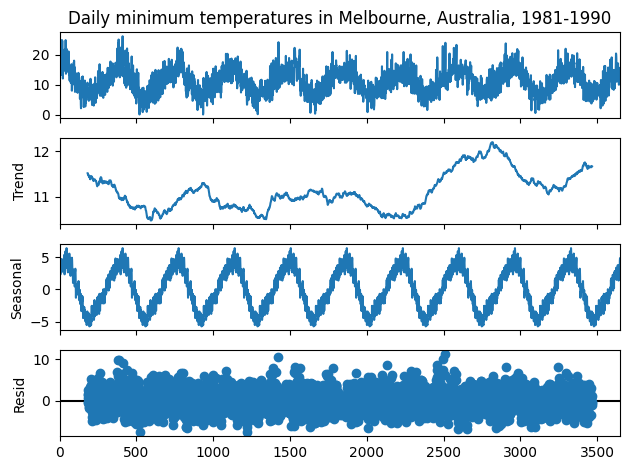

In [ ]:
result_temp = seasonal_decompose(df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], model='additive', period=365)

# Plotar a decomposição
result_temp.plot()
plt.tight_layout()
plt.show()

In [ ]:
df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].isna().sum()


0

In [ ]:
df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].dtypes


dtype('O')

In [ ]:
df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = pd.to_numeric(df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


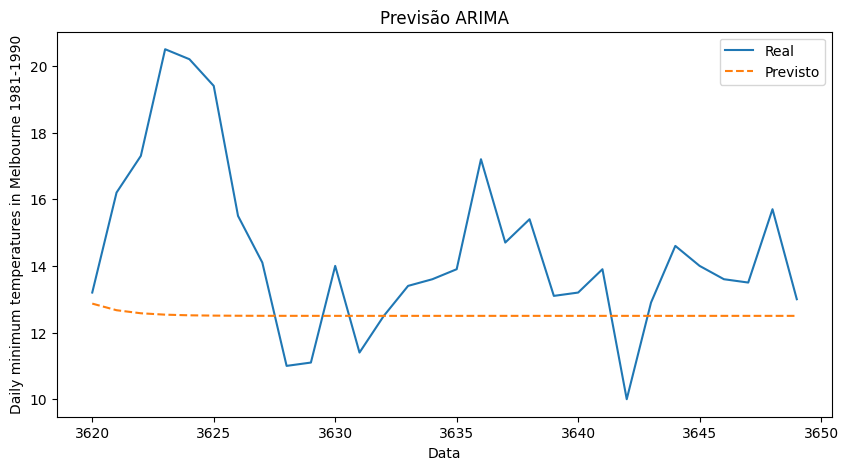

In [ ]:
train_data = df_temp.iloc[:-30]
test_data = df_temp.iloc[-30:]

model_temp = ARIMA(train_data['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], order=(1, 1, 1))
fitted_model_temp = model_temp.fit()

predictions = fitted_model_temp.forecast(steps=30)

plt.figure(figsize=(10, 5))
# plt.plot(train_data.index, train_data['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], label='Treino')
plt.plot(test_data.index, test_data['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], label='Real')
plt.plot(test_data.index, predictions, label='Previsto', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Daily minimum temperatures in Melbourne 1981-1990')
plt.title('Previsão ARIMA')
plt.legend()
plt.show()

In [ ]:
data = df_temp['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].values

train_size = len(data) - 90
train_data, test_data = data[:train_size], data[train_size:]

In [ ]:
len(data)-365

3285

In [ ]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 90))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# Ou experimente diferentes métodos de estimativa
#model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 365), method='lbfgs')
#model_fit = model.fit(disp=False)

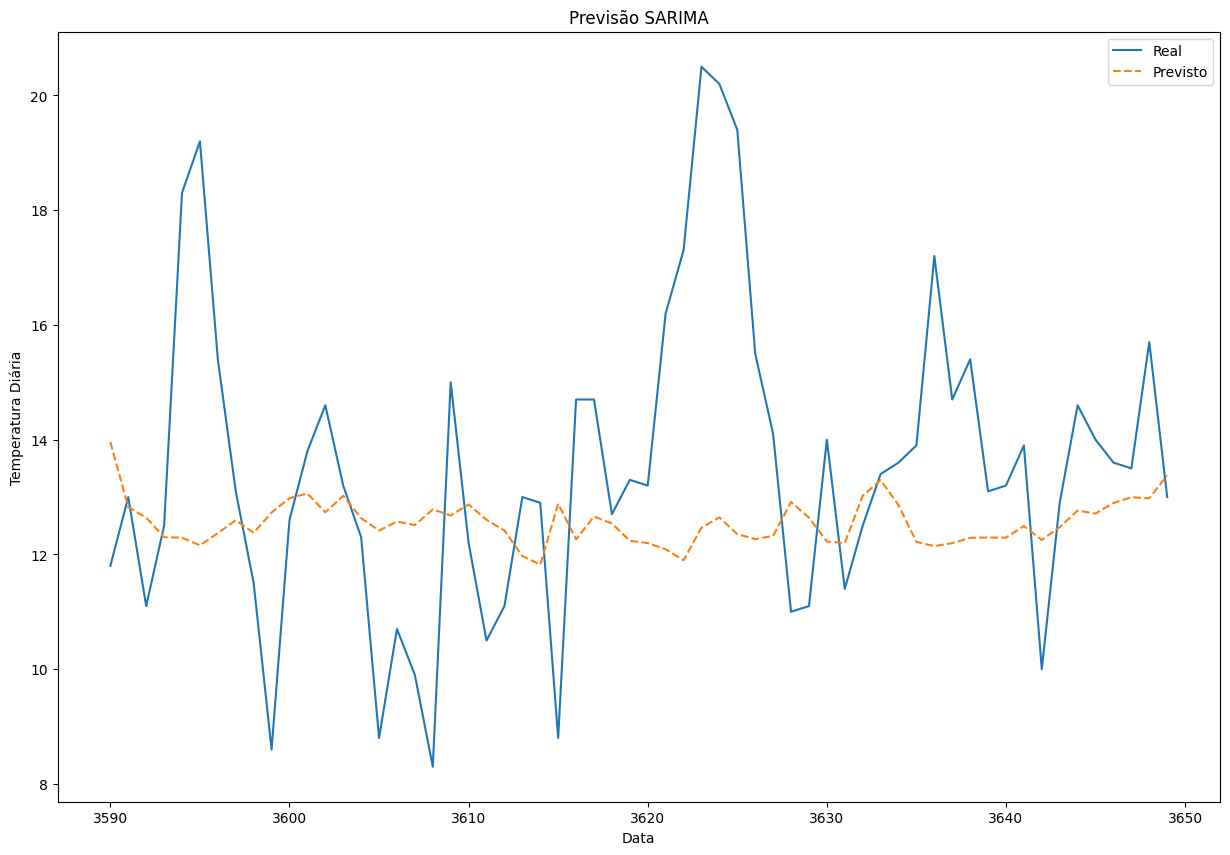

In [ ]:
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(15, 10))
# plt.plot(df.index[:train_size], train_data, label='Treino')
plt.plot(df_temp.index[train_size:], test_data, label='Real')
plt.plot(df_temp.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Temperatura Diária")
plt.title("Previsão SARIMA")
plt.legend()

plt.show()